In [1]:
import sys
!{sys.executable} -m pip install scipy


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt

In [7]:
def plot(xs : np.array, f, param_dict) -> None:
    """
        plot the function f at the points given by the np array xs.

        Input:
            xs : np.array
            f : lambda
            param_dict : param dictionary for pyplot.plot  
        Output:
            a plot of f at each of the points xs on a coordinate plane
    """
    plt.plot(xs, f(xs), **param_dict)
    plt.xlabel("x")
    plt.ylabel("y")
   
    return None

def plot_points(points : np.ndarray, param_dict) -> None:
    """
        plot a series of ponints given by "points" using parameters
        from the param dict.

        Input:
            points : np.array with shape (d,n), where n is the number
                    of points to be plotted and d is the dimension
                    of the coordinate system
            param_dict : param dictionary for pyplot.plot
        Output
            the points plotted on a coordinate plane using the param dict
    """
    plt.plot(points[0], points[1], **param_dict)
    
    return None


def spiderweb_diagram(f, x_0 : float = 0., n : int = 100) -> np.ndarray:
    """
        Prepare the spiderweb diagram from starting point (x = x_0, y = f(x_0)) and continue for n steps

        Input:
            f : function to iterate
            x_0 : initial x value.
            n : number of times to iterate the function.
        Output:
            the points defining the spiderweb diagram for the fixed-point iteration algorithm of f starting
            at (x_0, f(x_0)). Note that this is not the same as the orbit of x_0 on f, because it must include
            the points (x_i, x_i) for each i'th iteration of f.
    """
    # TODO: Dream up a way of doing this without a loop
    points = np.zeros(shape=(n*2 - 1, 2))
    x_i = x_0
    y_i = x_i
    for point in points :
        if x_i == y_i:
            point[0] = x_i
            point[1] = f(x_i)
            y_i = f(x_i)
        else:
            point[0] = y_i
            point[1] = y_i
            x_i = y_i
    
    return points.T # return the transpose of the points arr, because this is better for plotting

def sym_arr(range : float, steps : int) -> np.array :
    """
        creates a symmetrical numpy array with evenly spaced entries centered on 0.
        Input:
            range : the range of the entries in the array (max - min)
            steps : the number of entries in the array
        Output:
            a symmetrical array of "steps" entries, separated by "step"
            with a range of "range."
    """
    # TODO: Handle the case that steps is 0 or negative.

    # make an intermediate array of all ones with an extra entry at the beginning.
    # set said entry to 0 to ensure that the range is correct.
    intermediate_arr = np.ones((steps + 1, ))
    intermediate_arr[0] = 0

    # use the cumsum function to set the entries of the intermediate array to 
    # a series of consecutive integers. Shift and scale entries to arrive at
    # the desired array.
    intermediate_arr = intermediate_arr.cumsum() / steps * range - (range / 2)
    
    return intermediate_arr

In [42]:
# This cell defines constants for use throughout the rest of this workbook

# place the function you want to examine in the lambda on the next line
c = -2
f = lambda x : x**2 + c
y_x = lambda x : x

range = 4
steps = 100
zoom_factor = 0.1

# make a numpy array of "steps" x values with range "range" that is symmetric about the y-axis
xs = sym_arr(range, steps)
x_axis = np.array([[-(range / 2) - zoom_factor * (range / 2), range / 2 + zoom_factor * (range / 2)],[0,0]]) # two points to draw the x-axis

min_y = min(f(xs).min(), -(range / 2) - zoom_factor * (range / 2))
max_y = max(f(xs).max(), range / 2 + zoom_factor * (range / 2))
y_axis = np.array([[0,0],[min_y, max_y]])

f_color = "blue"
fixed_color = "orange"
axis_plot_dict = {"color": "black", "linestyle": "--"}

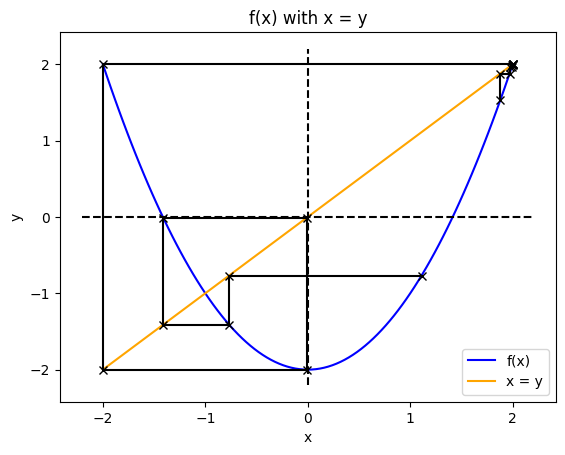

In [5]:
# Plot the function f, the line y = x, and the x and y axes on the coordinate plane

plt.title(f'f(x) with x = y')
plot(xs, f, {"color": f_color, "linestyle": "-", "label":"f(x)"})
plot(xs, y_x, {"color": fixed_color, "linestyle": "-", "label":"x = y"})
plot_points(x_axis, axis_plot_dict)
plot_points(y_axis, axis_plot_dict)
plt.legend()

# args for the spiderweb
x_0 = 1.11
n = 10

web_points = spiderweb_diagram(f, x_0, n)
plot_points(web_points, {"color":"black","linestyle":"-","marker":"x"})